<a href="https://www.kaggle.com/code/vijays140291/customer-purchase-analysis?scriptVersionId=198070434" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/electronic-sales-sep2023-sep2024/Electronic_sales_Sep2023-Sep2024.csv')
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [3]:
#getting preliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [4]:
#checking for missing values in the dataset
df.isna().sum()

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

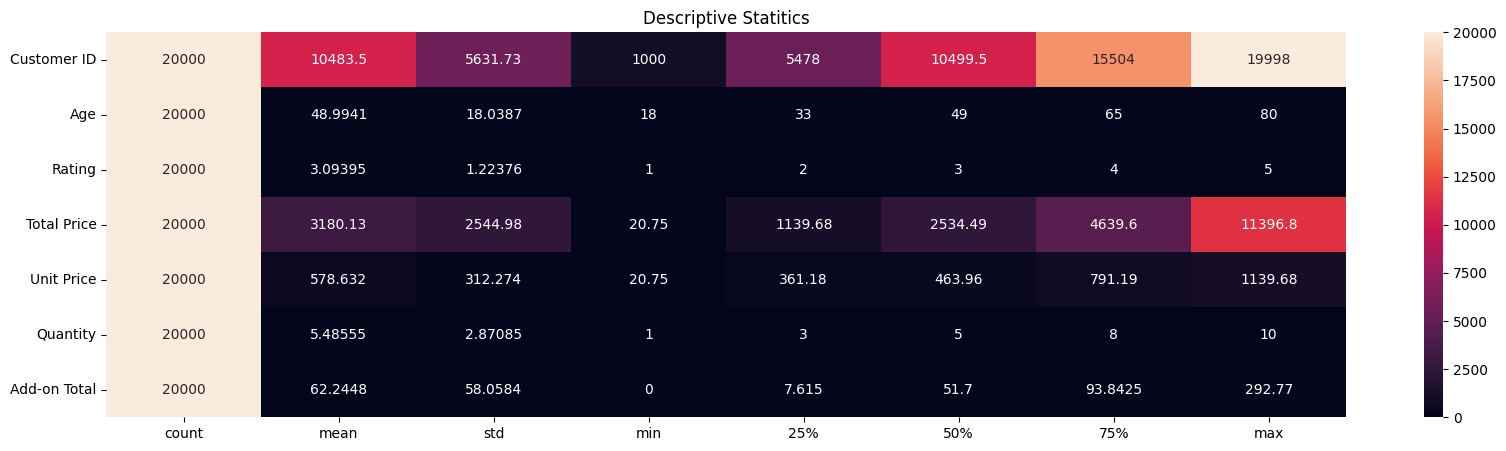

In [5]:
description=df.describe().T
plt.figure(figsize=(20,5))
sns.heatmap(description,annot=True,fmt='g')
plt.title('Descriptive Statitics')
plt.show()

In [6]:
import pandas as pd


df['Add-ons Purchased'] = df['Add-ons Purchased'].fillna('No Add-ons')

high_value_threshold = df['Total Price'].quantile(0.75) 
frequent_buyer_threshold = df['Quantity'].quantile(0.75)  


def customer_segment(row):
    if row['Total Price'] >= high_value_threshold and row['Quantity'] >= frequent_buyer_threshold:
        return 'High-Value Frequent Buyer'
    elif row['Total Price'] >= high_value_threshold:
        return 'High-Value Customer'
    elif row['Quantity'] >= frequent_buyer_threshold:
        return 'Frequent Buyer'
    else:
        return 'Regular Customer'

df['Customer Segment'] = df.apply(customer_segment, axis=1)

# Step 3: Group by 'Customer Segment', 'Product Type', and 'Add-ons Purchased'
# Perform count and mean calculations for relevant columns
purchase_behavior_segmentation = df.groupby(['Customer Segment']).agg(
    Customer_Count=('Customer ID', 'count'),
    Avg_Total_Price=('Total Price', 'mean'),
    Avg_Quantity=('Quantity', 'mean'),
    Avg_Rating=('Rating', 'mean'),
    Addon_Count=('Add-ons Purchased', 'count')
).reset_index()

# Step 4: Display the result
purchase_behavior_segmentation


,Customer Segment,Customer_Count,Avg_Total_Price,Avg_Quantity,Avg_Rating,Addon_Count
0,Frequent Buyer,2791,2698.227972,8.929774,3.389824,2791
1,High-Value Customer,1968,5706.272591,6.392785,2.808435,1968
2,High-Value Frequent Buyer,3191,7415.222375,9.036666,2.805390,3191
3,Regular Customer,12050,1757.675937,3.599253,3.148465,12050


In [7]:
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Customer Segment
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,High-Value Customer
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,Regular Customer
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,No Add-ons,0.00,Regular Customer
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,Regular Customer
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,Regular Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,No Add-ons,0.00,High-Value Customer
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,No Add-ons,0.00,Regular Customer
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,Regular Customer
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34,Regular Customer


In [8]:
import pandas as pd


product_type_revenue = df.groupby('Product Type').agg(
    Total_Revenue=('Total Price', 'sum'),
    Total_Quantity=('Quantity', 'sum'),
    Avg_Unit_Price=('Unit Price', 'mean')
).reset_index()

# Sort by Total Revenue to find the top-selling product types
top_selling_product_types = product_type_revenue.sort_values(by='Total_Revenue', ascending=False)

# Step 2: Analyze revenue by SKU
sku_revenue = df.groupby('SKU').agg(
    Total_Revenue=('Total Price', 'sum'),
    Total_Quantity=('Quantity', 'sum'),
    Avg_Unit_Price=('Unit Price', 'mean')
).reset_index()

# Sort by Total Revenue to find the top-selling SKUs
top_selling_skus = sku_revenue.sort_values(by='Total_Revenue', ascending=False)

# Step 3: Display the top-selling Product Types and SKUs
print("Top-Selling Product Types:")
print(top_selling_product_types)

print("\nTop-Selling SKUs:")
print(top_selling_skus)


Top-Selling Product Types:
  Product Type  Total_Revenue  Total_Quantity  Avg_Unit_Price
2   Smartphone    21516754.69           32660      652.880878
3   Smartwatch    14036273.06           21631      650.891668
1       Laptop    12296239.97           21584      567.907654
4       Tablet    11712000.41           22653      518.034279
0   Headphones     4041400.24           11183      361.411159

Top-Selling SKUs:
       SKU  Total_Revenue  Total_Quantity  Avg_Unit_Price
7   SMP234    12452143.68           10926     1139.680000
4  SKU1003     8986362.76           10637      844.820389
9   TBL345     8917102.99           11339      786.410000
5  SKU1004     8844964.80           11179      791.247677
1   LTP123     7310977.44           10842      674.320000
8   SWT567     5054040.50           10999      459.500000
6  SKU1005     4985913.24           10743      464.157684
0   HDP456     4037270.04           11178      361.180000
3  SKU1002     2794897.42           11314      247.030000
2 

In [9]:
import pandas as pd


df['Gender'] = df['Gender'].fillna('Unknown')


age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


customer_segment_revenue = df.groupby(['Loyalty Member']).agg(
    Total_Revenue=('Total Price', 'sum'),
    Avg_Revenue_Per_Customer=('Total Price', 'mean'),
    Customer_Count=('Customer ID', 'count'),
    Avg_Quantity_Per_Customer=('Quantity', 'mean')
).reset_index()

# Step 4: Display the result
customer_segment_revenue


,Loyalty Member,Total_Revenue,Avg_Revenue_Per_Customer,Customer_Count,Avg_Quantity_Per_Customer
0,No,49976751.24,3191.974915,15657,5.493645
1,Yes,13625917.13,3137.443502,4343,5.456367


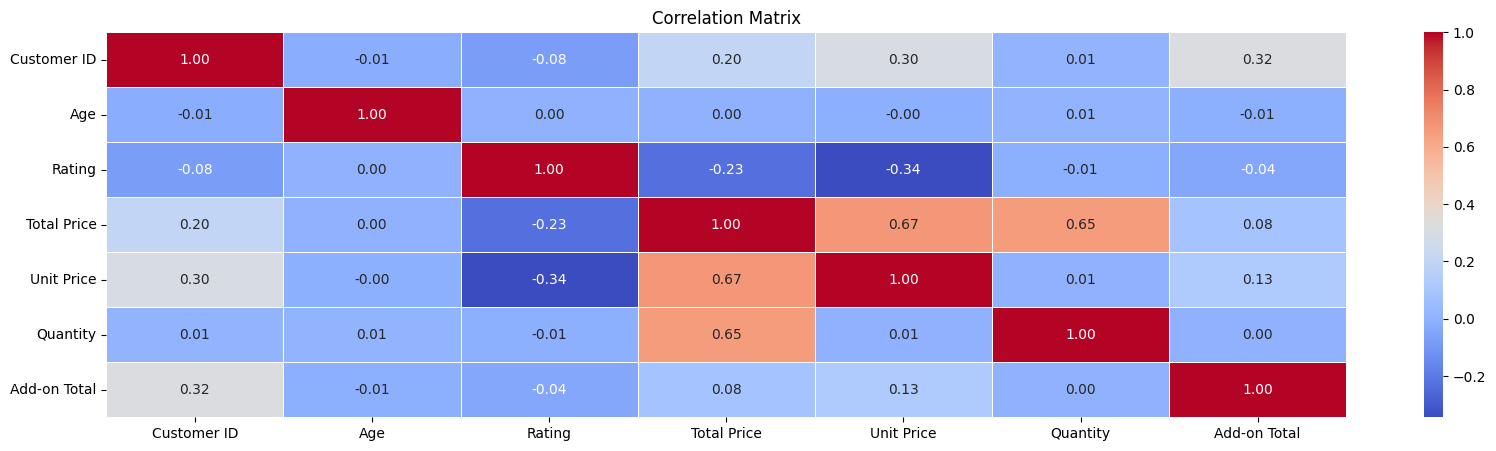

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with numerical data
# df = pd.read_csv('your_dataset.csv')  # Load your dataset

# Step 1: Select only columns that are numerical (int or float)
numeric_columns = [column for column in df.columns if df[column].dtype in ['int64', 'float64']]

# Step 2: Compute the correlation matrix for the selected numeric columns
corr = df[numeric_columns].corr()

# Step 3: Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# * There is negative correlation between rating and unit price i.e. the more expensive item is more likely customer rate it conservatively**

In [11]:

product_rating_analysis = df.groupby('Product Type').agg(
    Avg_Rating=('Rating', 'mean'),
    Rating_Count=('Rating', 'count')
).reset_index()

# Step 2: Sort the results by average rating to identify top and low rated product types
sorted_product_ratings = product_rating_analysis.sort_values(by='Avg_Rating', ascending=False)

# Step 3: Display the result
sorted_product_ratings


,Product Type,Avg_Rating,Rating_Count
2,Smartphone,3.319003,5978
4,Tablet,3.016326,4104
3,Smartwatch,2.994408,3934
0,Headphones,2.993536,2011
1,Laptop,2.984898,3973


<Figure size 800x800 with 0 Axes>

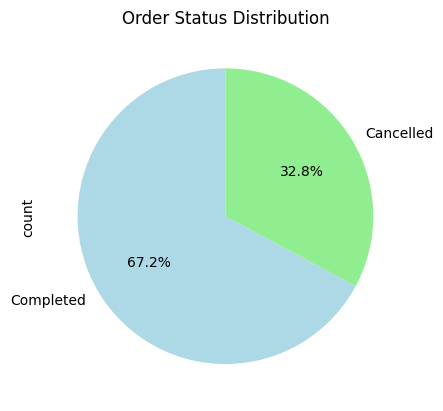

In [12]:
import pandas as pd


order_status_analysis = df['Order Status'].value_counts().reset_index()


plt.figure(figsize=(8,8))
order_status_analysis.set_index('Order Status').plot(kind='pie',subplots=True,autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'], legend=False)
plt.title('Order Status Distribution')
plt.show()


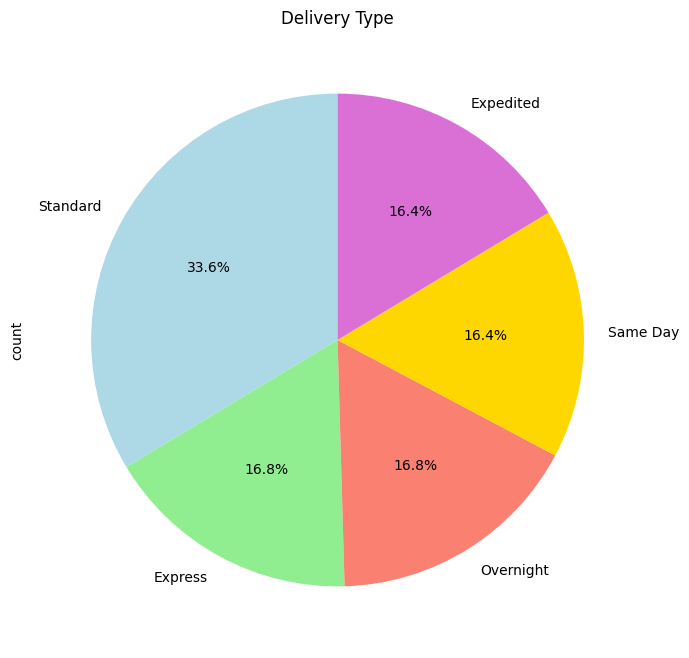

In [13]:
plt.figure(figsize=(8,8))
df['Shipping Type'].value_counts().plot(kind='pie',subplots=True,autopct='%1.1f%%', startangle=90,colors = ['lightblue', 'lightgreen', 'salmon', 'gold', 'orchid'], legend=False)
plt.title('Delivery Type')
plt.show()

In [14]:
df['Gender'].value_counts()

Gender
Male       10164
Female      9835
Unknown        1
Name: count, dtype: int64

array([<Axes: ylabel='count'>], dtype=object)

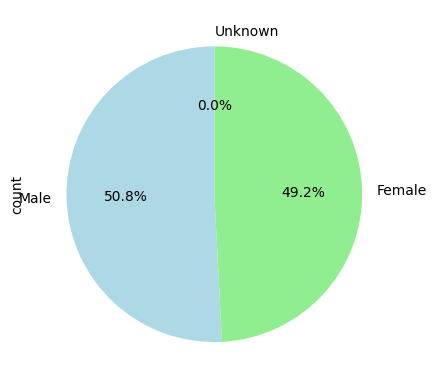

In [15]:
df['Gender'].value_counts().plot(kind='pie',subplots=True,autopct='%1.1f%%', startangle=90,colors = ['lightblue', 'lightgreen'], legend=False)


In [16]:
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Customer Segment,Age Group
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,High-Value Customer,46-55
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,Regular Customer,46-55
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,No Add-ons,0.00,Regular Customer,36-45
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,Regular Customer,36-45
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,Regular Customer,65+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,No Add-ons,0.00,High-Value Customer,26-35
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,No Add-ons,0.00,Regular Customer,26-35
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,Regular Customer,26-35
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34,Regular Customer,26-35


In [20]:
df['Add-ons Purchased']=df['Add-ons Purchased'].apply(lambda x:1 if x=='No Add-ons' else 0)

In [22]:
df['Add-ons Purchased'].value_counts()

Add-ons Purchased
0    15132
1     4868
Name: count, dtype: int64

In [25]:
df=df.drop('Customer ID',axis=1)

In [27]:
df['Gender']=df['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [32]:
product_encoding={'Smartphone':0, 'Tablet':1, 'Laptop':2, 'Smartwatch':3, 'Headphones':4}
df['Product Type']=df['Product Type'].replace(product_encoding)

/tmp/ipykernel_30/2513116195.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Product Type']=df['Product Type'].replace(product_encoding)


In [36]:
SKU={'SKU1004':0,
 'SKU1002':1,
 'SKU1005':2,
 'SKU1001':3,
 'SKU1003':4,
 'LTP123':5,
 'SMP234':6,
 'TBL345':7,
 'HDP456':8,
 'SWT567':9}
df['SKU']=df['SKU'].replace(SKU)

/tmp/ipykernel_30/2592168165.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SKU']=df['SKU'].replace(SKU)


In [38]:
df['Order Status']=df['Order Status'].replace({'Cancelled':0,'Completed':1})

/tmp/ipykernel_30/2568662790.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Order Status']=df['Order Status'].replace({'Cancelled':0,'Completed':1})


In [40]:
df['Purchase Year']=df['Purchase Date'].apply(lambda x:x.split('-')[0]).astype(int)

df['Purchase Month']=df['Purchase Date'].apply(lambda x:x.split('-')[1]).astype(int)
df['Purchase Day']=df['Purchase Date'].apply(lambda x:x.split('-')[2]).astype(int)
df=df.drop('Purchase Date',axis=1)

In [44]:
age_group_encoding={'46-55':3, '36-45':2, '65+':5, '26-35':1, '18-25':0, '56-65':4}
df['Age Group']=df['Age Group'].replace(age_group_encoding)

/tmp/ipykernel_30/252407286.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Age Group']=df['Age Group'].replace(age_group_encoding)


In [49]:
customer_segment_encoding={'High-Value Customer':0,
 'Regular Customer':1,
 'High-Value Frequent Buyer':2,
 'Frequent Buyer':3}
df['Customer Segment']=df['Customer Segment'].replace(customer_segment_encoding)

/tmp/ipykernel_30/2565825607.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Customer Segment']=df['Customer Segment'].replace(customer_segment_encoding)


In [53]:
shipping_encoding={'Standard':0, 'Overnight':1, 'Express':2, 'Same Day':3, 'Expedited':4}
df['Shipping Type']=df['Shipping Type'].replace(shipping_encoding)

/tmp/ipykernel_30/18112329.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Shipping Type']=df['Shipping Type'].replace(shipping_encoding)


In [58]:
list(df['Payment Method'].unique())

['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer', 'PayPal']

In [59]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [60]:
df=onehot_encode(df,'Payment Method')

In [62]:
for column in df.columns:
    if df[column].dtype=='bool':
        df[column]=df[column].astype(int)

In [64]:
df['Loyalty Member']=df['Loyalty Member'].replace({'Yes':1,'No':0})

/tmp/ipykernel_30/3728019872.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Loyalty Member']=df['Loyalty Member'].replace({'Yes':1,'No':0})


In [66]:
y=df['Loyalty Member']
x=df.drop('Loyalty Member',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)

In [69]:
x_train.shape

(14000, 23)

In [87]:
y_test

12136    0
16812    0
10072    1
5850     1
4320     0
        ..
8500     0
5440     0
7153     0
17535    0
9565     0
Name: Loyalty Member, Length: 6000, dtype: int64

# 

# Constructing the Model

In [88]:
inputs=tf.keras.Input(shape=(23,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
BATCH_SIZE=64
EPOCHS=100
history=model.fit(x_train,y_train,validation_split=0.2,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=[
                tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True,verbose=1)])

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7627 - auc: 0.4957 - loss: 0.5514 - val_accuracy: 0.7875 - val_auc: 0.4967 - val_loss: 0.5236
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7832 - auc: 0.5360 - loss: 0.5227 - val_accuracy: 0.7875 - val_auc: 0.4952 - val_loss: 0.5226
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7853 - auc: 0.5801 - loss: 0.5142 - val_accuracy: 0.7875 - val_auc: 0.4944 - val_loss: 0.5230
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7885 - auc: 0.5859 - loss: 0.5088 - val_accuracy: 0.7875 - val_auc: 0.4981 - val_loss: 0.5240
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7844 - auc: 0.5978 - loss: 0.5115 - val_accuracy: 0.7875 - val_auc: 0.5001 - val_loss: 0.5242
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


In [89]:
model.evaluate(x_test,y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - auc: 0.4799 - loss: 0.5428


[0.534539520740509, 0.778333306312561, 0.4921834468841553]

In [78]:
from sklearn.metrics import confusion_matrix,classification_report

In [82]:
y_test.value_counts()

Loyalty Member
0    4670
1    1330
Name: count, dtype: int64

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


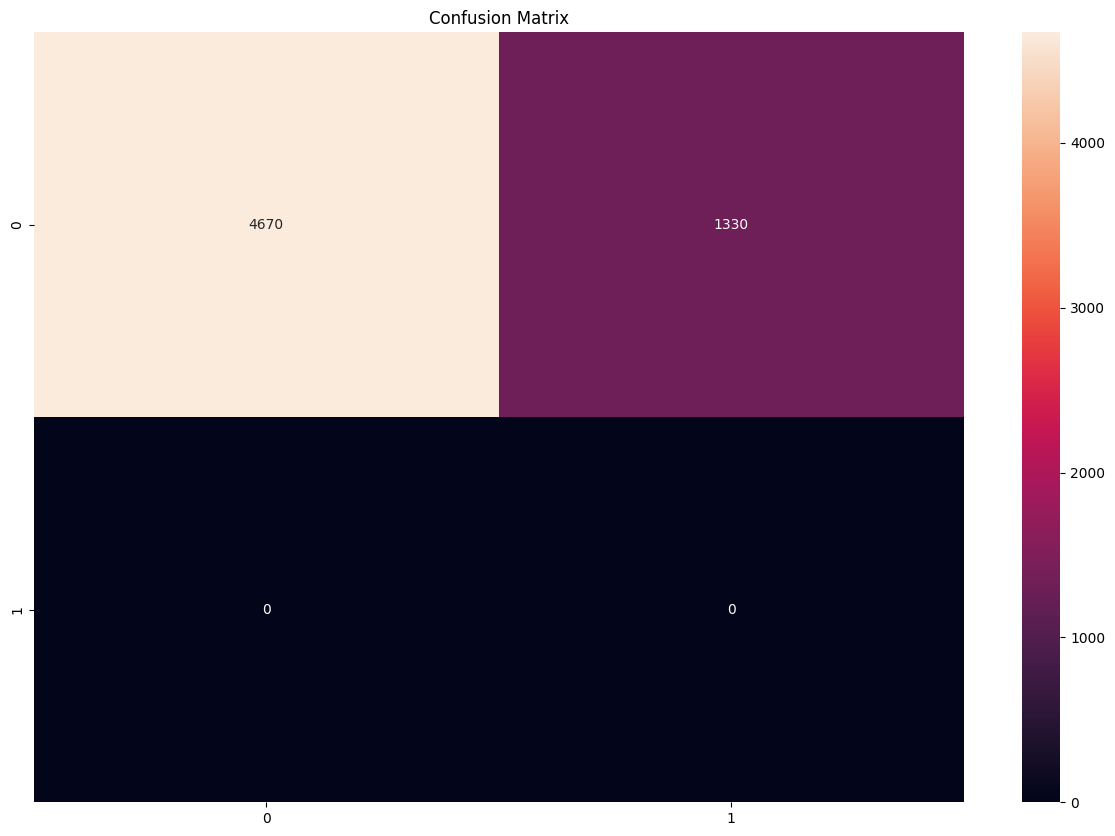

In [90]:
y_pred=np.squeeze(model.predict(x_test))
y_pred=(y_pred>0.5).astype(int)
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.show()



In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7768333333333334

In [ ]:
y_pred=model.predict(x_test)

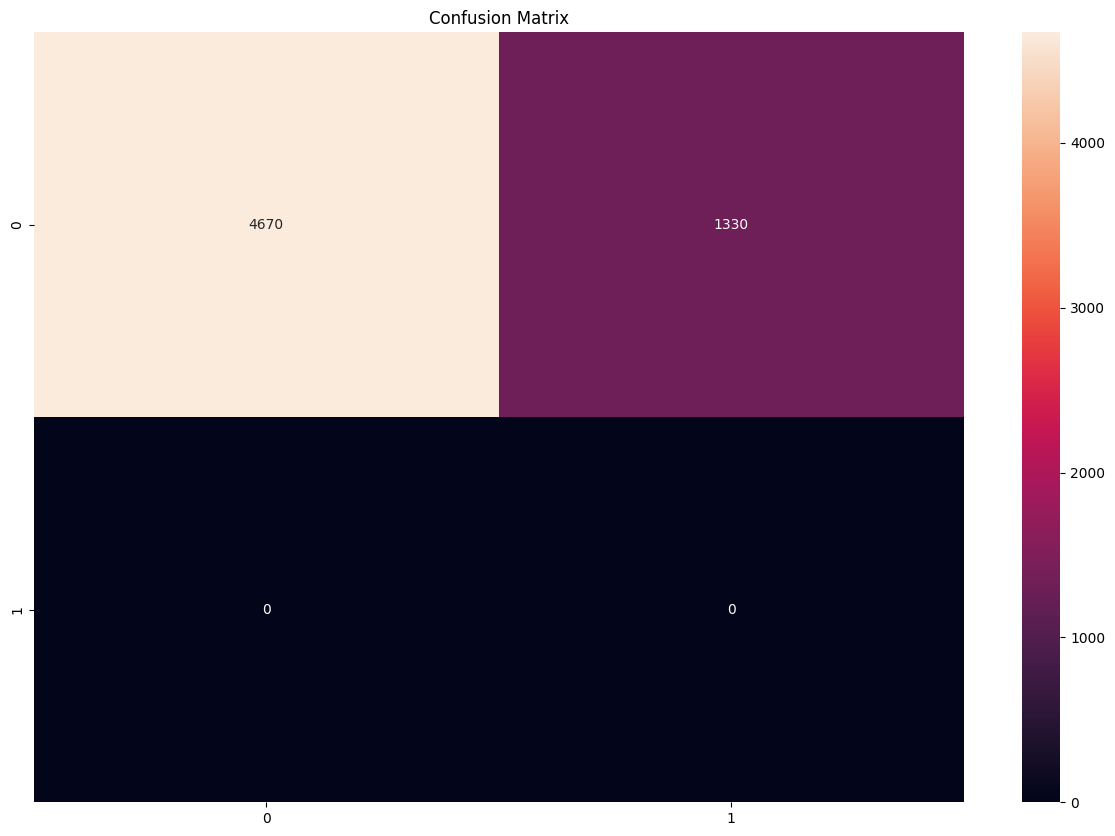

In [93]:
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.show()


In [24]:
df['SKU'].value_counts()

SKU
TBL345     2062
SKU1002    2042
SKU1004    2019
SKU1005    2012
HDP456     2010
SMP234     1987
SWT567     1980
SKU1001    1972
LTP123     1961
SKU1003    1955
Name: count, dtype: int64